In [4]:
#從Yahoo Finace取資料
import matplotlib.pyplot as plt
import warnings
plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
# plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 100
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd 
import yfinance as yf
df_MTK = yf.download('2454.TW', 
                       start='2020-12-01', 
                       end='2021-3-31',
                       progress=False)
print(f'Downloaded {df_yahoo.shape[0]} rows of data.')
df_MTK.head()

Downloaded 77 rows of data.


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-01,700.0,708.0,693.0,697.0,697.0,8450506
2020-12-02,706.0,717.0,695.0,712.0,712.0,8354076
2020-12-03,715.0,715.0,698.0,700.0,700.0,6972483
2020-12-04,700.0,707.0,696.0,705.0,705.0,5398397
2020-12-07,705.0,708.0,695.0,704.0,704.0,5457769


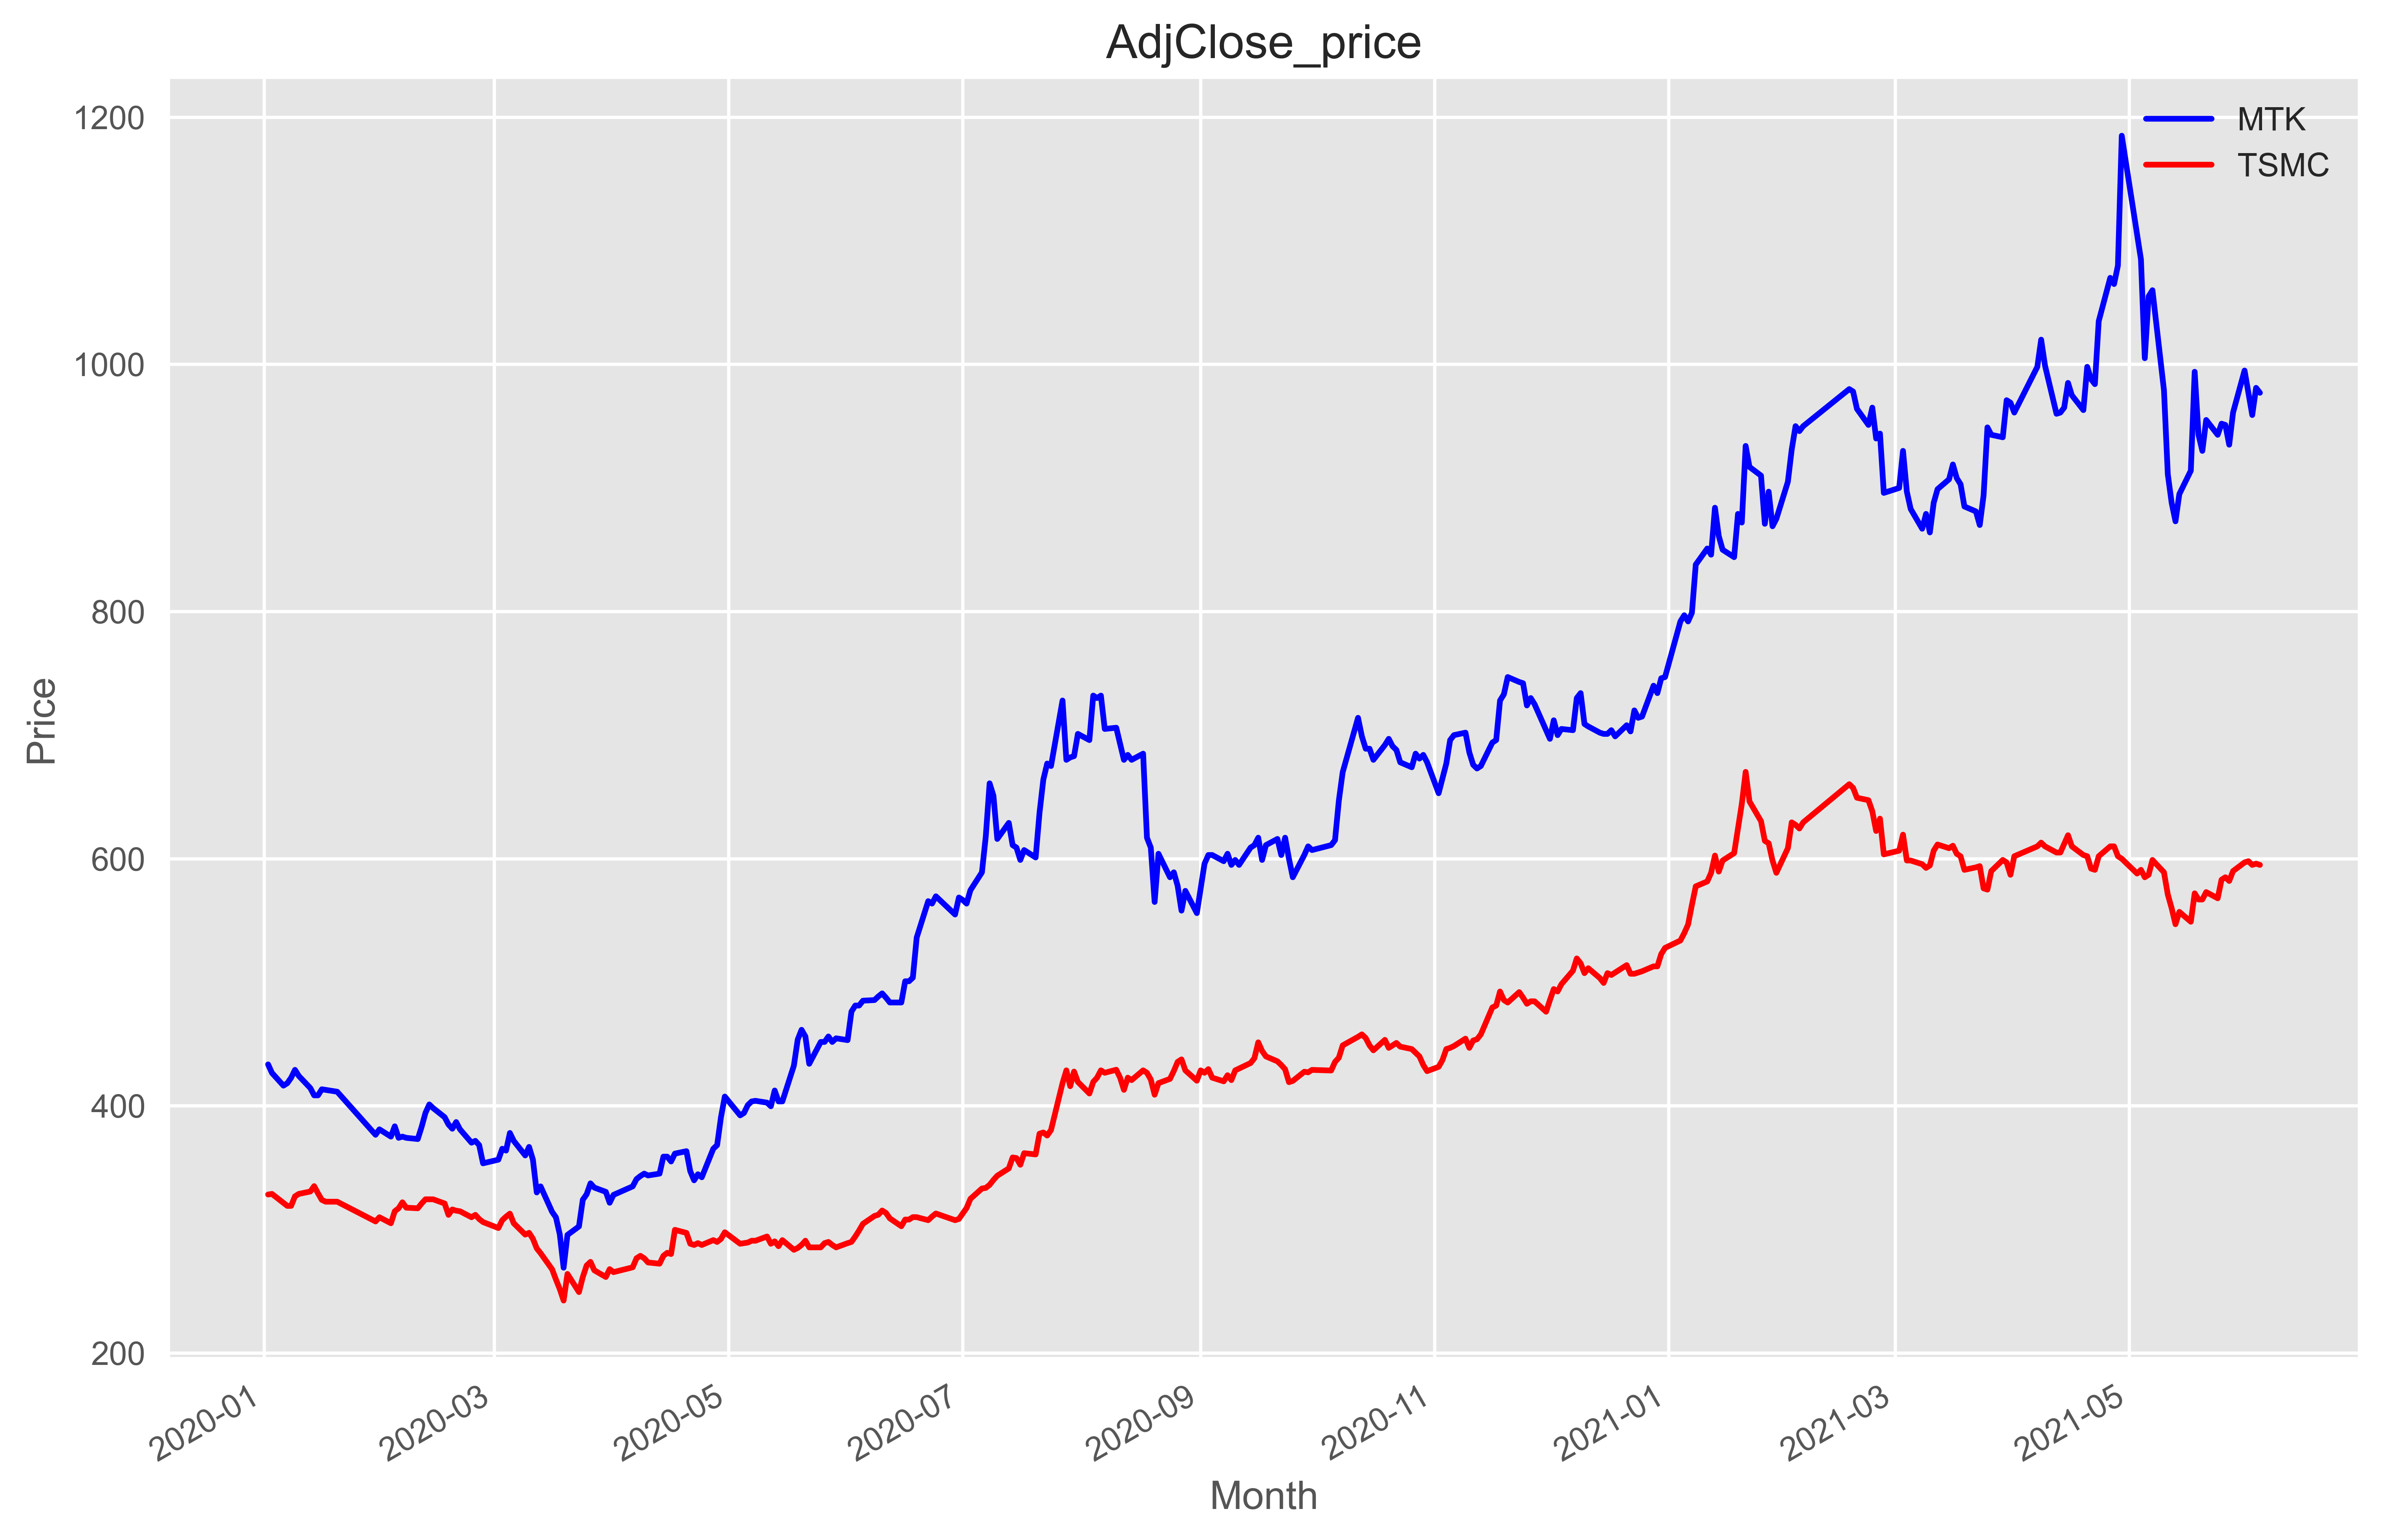

In [1]:
#從Yahoo Finace取收盤價
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import warnings
import pandas as pd 
import yfinance as yf
import datetime as datetime
plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.style.use('ggplot')
fig , ax = plt.subplots()

df_mtk = yf.download('2454.TW', 
                    start='2020-01-01',
                    progress=False)
df_mtk['Adj Close'].plot(figsize=(12, 8),color='Blue', label='MTK')

df_TSMC = yf.download('2330.TW', 
                    start='2020-01-01',
                    progress=False)
df_TSMC['Adj Close'].plot(figsize=(12, 8),color='Red', label='TSMC')

plt.xlabel("Month")
plt.ylabel("Price")
plt.title("AdjClose_price");
plt.legend(loc = 0) 

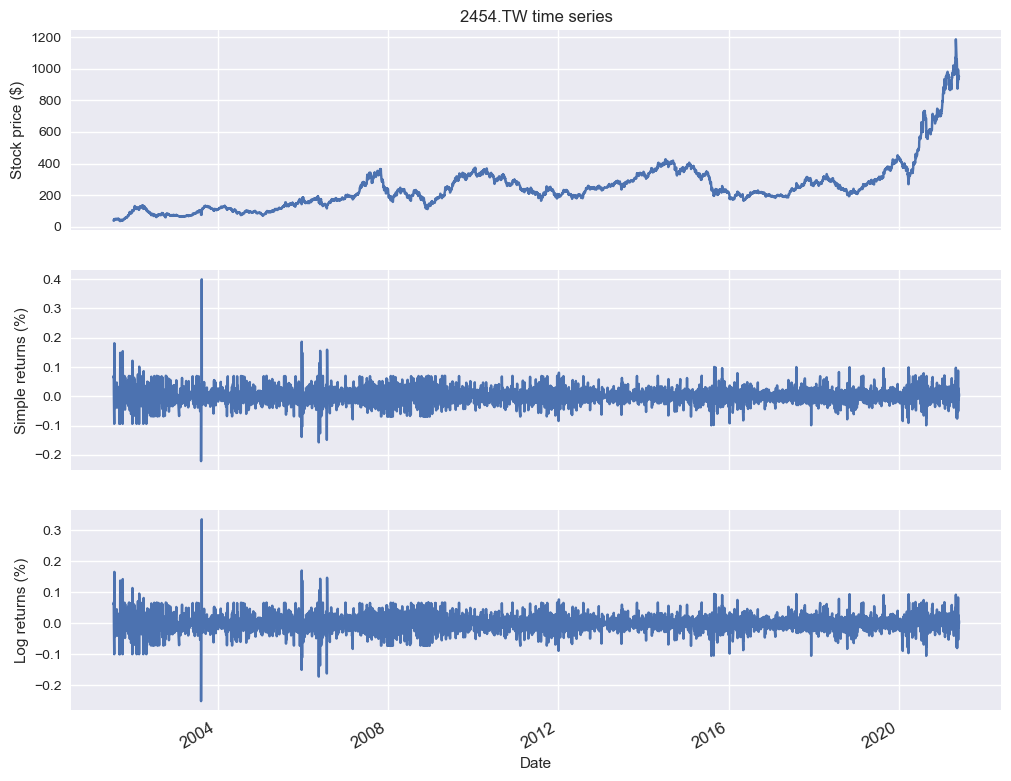

In [9]:
import pandas as pd 
import yfinance as yf
import numpy as np
df = yf.download('2454.TW', auto_adjust = False, progress=False)
df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close': 'adj_close'}, inplace=True)
df['simple_rtn'] = df.adj_close.pct_change()
df['log_rtn'] = np.log(df.adj_close / df.adj_close.shift(1))
df.dropna(how = 'any', inplace = True)
fig, ax = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
#prices
df.adj_close.plot(ax=ax[0])
ax[0].set(title = '2454.TW time series',
          ylabel = 'Stock price ')   
#simple returns 
df.simple_rtn.plot(ax=ax[1])
ax[1].set(ylabel = 'Simple returns (%)')
#log returns 
df.log_rtn.plot(ax=ax[2])
ax[2].set(xlabel = 'Date', 
          ylabel = 'Log returns (%)')
ax[2].tick_params(axis='x', 
                  which='major', 
                  labelsize=12)
plt.show()